In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_theme(style="darkgrid")
import statsmodels.api as sm
import json
import statsmodels.api as sm

Check and clean data

In [61]:
fadata= pd.read_csv('Simulated_DataFA.csv')
fadata

,Student ID,Year,Race,State,Financial Aid Type,Financial Aid Amount,Matriculated,Unnamed: 7
0,1,2021,Hispanic,CA,Grant,40532.82,Yes,NaN
1,2,2021,Other,IL,Loan,9104.27,No,NaN
2,3,2021,Asian,IL,Grant,27248.91,No,NaN
3,4,2021,Other,OH,Loan,7590.14,No,
4,5,2021,Other,GA,Loan,29728.80,No,NaN
...,...,...,...,...,...,...,...,...
195,196,2024,Asian,NC,Loan,7748.51,Yes,NaN
196,197,2024,White,NC,Grant,17459.49,Yes,NaN
197,198,2024,Other,OH,Loan,41279.06,No,NaN
198,199,2024,Hispanic,CA,Loan,38671.69,No,NaN


In [62]:
data = pd.read_csv("Simulated_DataFA.csv")

Drop the Unnamed: 7 column

In [63]:
data= data.drop(columns=["Unnamed: 7"], errors="ignore")

In [64]:
print(data.isnull().sum())

Student ID              0
Year                    0
Race                    0
State                   0
Financial Aid Type      0
Financial Aid Amount    0
Matriculated            0
dtype: int64


In [65]:
data= data.dropna()

In [67]:
data

,Student ID,Year,Race,State,Financial Aid Type,Financial Aid Amount,Matriculated
0,1,2021,Hispanic,CA,Grant,40532.82,Yes
1,2,2021,Other,IL,Loan,9104.27,No
2,3,2021,Asian,IL,Grant,27248.91,No
3,4,2021,Other,OH,Loan,7590.14,No
4,5,2021,Other,GA,Loan,29728.80,No
...,...,...,...,...,...,...,...
195,196,2024,Asian,NC,Loan,7748.51,Yes
196,197,2024,White,NC,Grant,17459.49,Yes
197,198,2024,Other,OH,Loan,41279.06,No
198,199,2024,Hispanic,CA,Loan,38671.69,No


checking dataset columns

In [68]:
print(data.columns)

Index(['Student ID ', 'Year', 'Race', 'State', 'Financial Aid Type',
       'Financial Aid Amount', 'Matriculated'],
      dtype='object')


In [69]:
X = data[["Financial Aid Type", "Financial Aid Amount"]]
y = data["Matriculated"]

**Bar Plot: Financial Aid Amount and Financial Aid Type in Relation to Matriculation**

<Axes: xlabel='Financial Aid Amount', ylabel='Matriculated'>

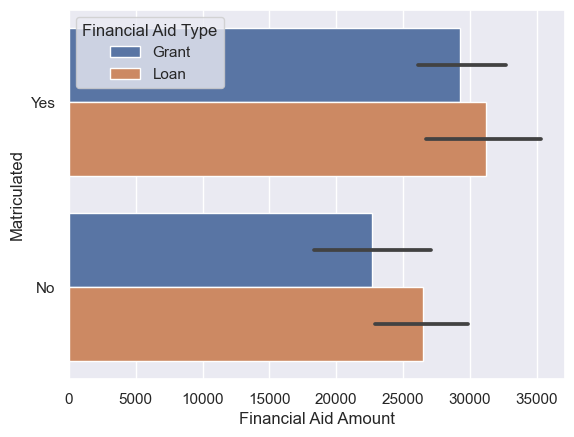

In [70]:
sns.barplot(x='Financial Aid Amount', y='Matriculated', hue='Financial Aid Type', data=fadata)

<Axes: xlabel='Financial Aid Amount', ylabel='Matriculated'>

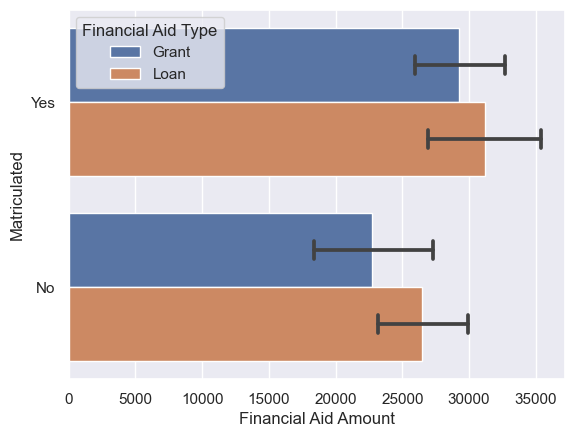

In [71]:
sns.barplot(x='Financial Aid Amount', y='Matriculated', hue='Financial Aid Type', capsize=0.1, data=fadata)

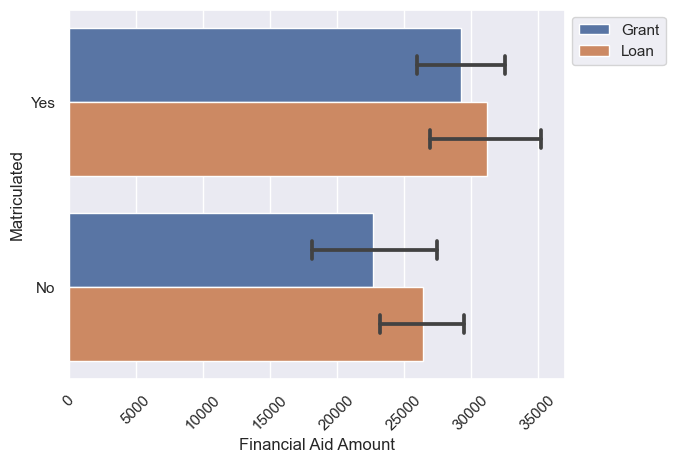

In [72]:
sns.barplot(x='Financial Aid Amount', y='Matriculated', hue='Financial Aid Type', capsize=0.1, data=fadata)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()
#this chart is showing the relationship between financial aid amount and matriculation status. The key is now moved to a better spot

In [73]:
print(fadata.dtypes)

Student ID                int64
Year                      int64
Race                     object
State                    object
Financial Aid Type       object
Financial Aid Amount    float64
Matriculated             object
Unnamed: 7               object
dtype: object


**Choropleth Map: Visulization of Financial Aid Amount by State**

In [74]:
fig = px.choropleth(
    fadata,
    locations='State',                
    locationmode='USA-states',       
    color='Financial Aid Amount',     
    hover_data=['Financial Aid Type', 'Matriculated'], 
    scope="usa",                      
    color_continuous_scale='Viridis', 
    title="Financial Aid Type and Matriculation by State"
)


fig.show()

#Visulization of financial aid amounts by state

In [75]:
print(fadata['State'].unique())

['CA' 'IL' 'OH' 'GA' 'NY' 'TX' 'NC' 'PA' 'M' 'MI' 'FL']


Checking an issues with the State Codes- cleaning data

In [101]:
fadata['State'] = fadata['State'].replace({'M': 'MO'}) 

Removing invaild states

In [102]:
valid_states = set(state_coords.keys())
fadata = fadata[fadata['State'].isin(valid_states)]

In [129]:
fadata['Latitude'] = fadata['State'].map(lambda x: state_coords[x][0])
fadata['Longitude'] = fadata['State'].map(lambda x: state_coords[x][1])
#adding lat and long for the upcoming datasets

checking for missing lat values

In [104]:
print(fadata[fadata['Latitude'].isna()])

Empty DataFrame
Columns: [Student ID , Year, Race, State, Financial Aid Type, Financial Aid Amount, Matriculated, Unnamed: 7, Matriculated_Binary, Predicted_Probability, Latitude, Longitude]
Index: []


In [105]:
print("Unique state values:", fadata['State'].unique())

Unique state values: ['CA' 'IL' 'OH' 'GA' 'NY' 'TX' 'NC' 'PA' 'MO' 'MI' 'FL']


In [130]:
state_coords = {
   "AL": [32.806671, -86.791130], "AK": [61.370716, -152.404419], "AZ": [33.729759, -111.431221],
   "AR": [34.746613, -92.288986], "CA": [36.778259, -119.417931], "CO": [39.550051, -105.782067],
   "CT": [41.603221, -73.087749], "DE": [38.910832, -75.527670], "FL": [27.994402, -81.760254],
   "GA": [32.157435, -82.907123], "HI": [19.896766, -155.582779], "ID": [44.068203, -114.742043],
   "IL": [40.633125, -89.398529], "IN": [40.551217, -85.602364], "IA": [41.878003, -93.097702],
   "KS": [39.011902, -98.484246], "KY": [37.839333, -84.270018], "LA": [30.984298, -91.962333],
   "ME": [45.253783, -69.445469], "MD": [39.045755, -76.641271], "MA": [42.407211, -71.382437],
   "MI": [44.314844, -85.602364], "MN": [46.729553, -94.685900], "MS": [32.354668, -89.398529],
   "MO": [37.964253, -91.831833], "MT": [46.879682, -110.362566], "NE": [41.492537, -99.901813],
   "NV": [38.802610, -116.419389], "NH": [43.193852, -71.572395], "NJ": [40.058324, -74.405661],
   "NM": [34.972730, -105.032363], "NY": [43.299428, -74.217933], "NC": [35.759573, -79.019300],
   "ND": [47.551493, -101.002012], "OH": [40.417287, -82.907123], "OK": [35.007752, -97.092877],
   "OR": [43.804133, -120.554201], "PA": [41.203322, -77.194525], "RI": [41.580095, -71.477429],
   "SC": [33.836081, -81.163725], "SD": [43.969515, -99.901813], "TN": [35.517491, -86.580447],
   "TX": [31.968599, -99.901813], "UT": [39.320980, -111.093731], "VT": [44.558803, -72.577841],
   "VA": [37.431573, -78.656894], "WA": [47.751076, -120.740135], "WV": [38.597626, -80.454903],
   "WI": [43.784440, -88.787868], "WY": [43.075968, -107.290283]
}

fadata['Latitude'] = fadata['State'].map(lambda x: state_coords[x][0])
fadata['Longitude'] = fadata['State'].map(lambda x: state_coords[x][1])

#mapping for States- source from: https://simplemaps.com/docs/regions, for coordinates

**Scatter Map**

In [131]:
fig2 = px.scatter_mapbox(
    fadata,
    lat='Latitude',
    lon='Longitude',
    hover_name='Student ID ',
    hover_data={
        'State': True,
        'Financial Aid Type': True,
        'Financial Aid Amount': True,
        'Matriculated': True
    },
    color='Matriculated', 
    color_discrete_map={'Yes': 'green', 'No': 'red'},
    title='Scatter Map: Students, Financial Aid, and Matriculation',
    zoom=3,
    height=700
)


fig2.update_layout(
    mapbox_style="carto-positron",
    mapbox_center={"lat": 37.0902, "lon": -95.7129},  # Center over the US
    margin={"r": 0, "t": 40, "l": 0, "b": 0}
)


fig2.show()
#Not pleased with this particular map. Need a map that shows each student-research where I went wrong.

Checking rows and columns that are present in the dataset

In [108]:
print(fadata.shape)

(200, 12)


In [109]:
print(fadata[['Latitude', 'Longitude']].isnull().sum())

Latitude     0
Longitude    0
dtype: int64


In [110]:
print(fadata['State'].unique())

['CA' 'IL' 'OH' 'GA' 'NY' 'TX' 'NC' 'PA' 'MO' 'MI' 'FL']


In [115]:
fadata['Latitude'] += np.random.uniform(-0.1, 0.1, size=fadata.shape[0])
fadata['Longitude'] += np.random.uniform(-0.1, 0.1, size=fadata.shape[0])

**Scatter Map Attempt 2**

In [142]:
fig4 = px.scatter_mapbox(
    fadata,
    lat='Latitude',
    lon='Longitude',
    hover_name='Student ID ',
    hover_data={
        'State': True,
        'Financial Aid Type': True,
        'Financial Aid Amount': True,
        'Matriculated': True
    },
    color='Matriculated',
    size='Financial Aid Amount',
    color_discrete_map={'Yes': 'green', 'No': 'red'},
    title='Scatter Map: Students, Financial Aid, and Matriculation',
    zoom=3,
    height=700
)

fig4.update_layout(
    mapbox_style="carto-positron",
    mapbox_center={"lat": 37.0902, "lon": -95.7129}, #double check these plot points
    margin={"r": 0, "t": 40, "l": 0, "b": 0}
)

fig4.show()
#Could not figure out how to spread the plot points but all are there now

**Regression Model:Financial Aid Vs. Matriculation**

Optimization terminated successfully.
         Current function value: 0.676718
         Iterations 4
                            Logit Regression Results                           
Dep. Variable:     Matriculated_Binary   No. Observations:                  200
Model:                           Logit   Df Residuals:                      198
Method:                            MLE   Df Model:                            1
Date:                 Sun, 08 Dec 2024   Pseudo R-squ.:                 0.02194
Time:                         21:41:48   Log-Likelihood:                -135.34
converged:                        True   LL-Null:                       -138.38
Covariance Type:             nonrobust   LLR p-value:                   0.01374
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.6034      0.322     -1.875      0.061      -1.234    

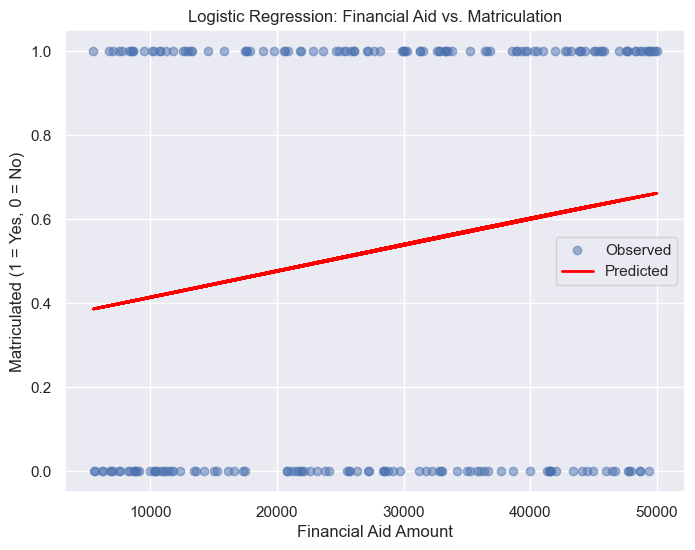

In [111]:
fadata['Matriculated_Binary'] = fadata['Matriculated'].map({'Yes': 1, 'No': 0})

#defining the independent and dependent variable
X = fadata['Financial Aid Amount']  
y = fadata['Matriculated_Binary']   


X = sm.add_constant(X) #adding a constant to the model

model = sm.Logit(y, X)  
result = model.fit()


print(result.summary())


fadata['Predicted_Probability'] = result.predict(X)


import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(fadata['Financial Aid Amount'], fadata['Matriculated_Binary'], label='Observed', alpha=0.5)
plt.plot(fadata['Financial Aid Amount'], fadata['Predicted_Probability'], color='red', label='Predicted', linewidth=2)
plt.xlabel('Financial Aid Amount')
plt.ylabel('Matriculated (1 = Yes, 0 = No)')
plt.title('Logistic Regression: Financial Aid vs. Matriculation')
plt.legend()
plt.grid(True)
plt.show()

**Bar Chart: Financial Aid Amount Vs. Matriculation Status**

In [118]:
fig5 = px.bar(fadata, 
             x='Matriculated', 
             y='Financial Aid Amount',
             color='Matriculated',
             labels={'Matriculated': 'Matriculated Status', 'Financial Aid Amount': 'Financial Aid Amount'},
             title='Financial Aid Amount vs Matriculation Status')

fig5.show()

**Bar Chart: Financial Aid Type vs. Matriculation Status**

In [134]:
fig6 = px.bar(fadata, 
             x='Financial Aid Type', 
             color='Matriculated', 
             title="Financial Aid Type vs. Matriculation Status",
             labels={'Financial Aid Type': 'Type of Financial Aid', 'Matriculated': 'Matriculated Status'},
             barmode='group')

fig6.show()


**Scatter Plot: Financial Aid Amount vs. Matriculation Status**

In [135]:
fig7 = px.scatter(fadata, 
                 x='Financial Aid Amount', 
                 y='Matriculated', 
                 color='Matriculated', 
                 title='Financial Aid Amount vs Matriculation Status',
                 labels={'Financial Aid Amount': 'Financial Aid Amount', 'Matriculated': 'Matriculated Status'})

fig7.show()
#Not going to use in the presentation 

**Pie Chart: Proportion of Matriculated vs. Non-Matriculated**

In [137]:
fig8 = px.pie(fadata, 
             names='Matriculated', 
             title='Proportion of Matriculated vs. Non-Matriculated Students')

fig8.show()
#This shows a clear "picture" of the success rate of students that matriculate to the med school vs. those who turn down the offer

**Histogram: Distribution of Financial Aid Amount**

In [138]:
fig9 = px.histogram(fadata, 
                   x='Financial Aid Amount', 
                   title='Distribution of Financial Aid Amount')

fig9.show()
#More likely to give out between 7,500-12,400k for FA

**Bar Chart: Avg. Financial Aid Amount by Race**

In [141]:
fig10 = px.bar(fadata.groupby('Race')['Financial Aid Amount'].mean().reset_index(), 
             x='Race', 
             y='Financial Aid Amount', 
             title='Average Financial Aid Amount by Race')

fig10.show()
#Important to show the distribution of FA by race as requested by stakeholder

**Pairplot: Relationships Between Variables**

C:\Users\ixw35\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\Users\ixw35\AppData\Local\Temp\ipykernel_14644\734904379.py:3: UserWarning:

The figure layout has changed to tight



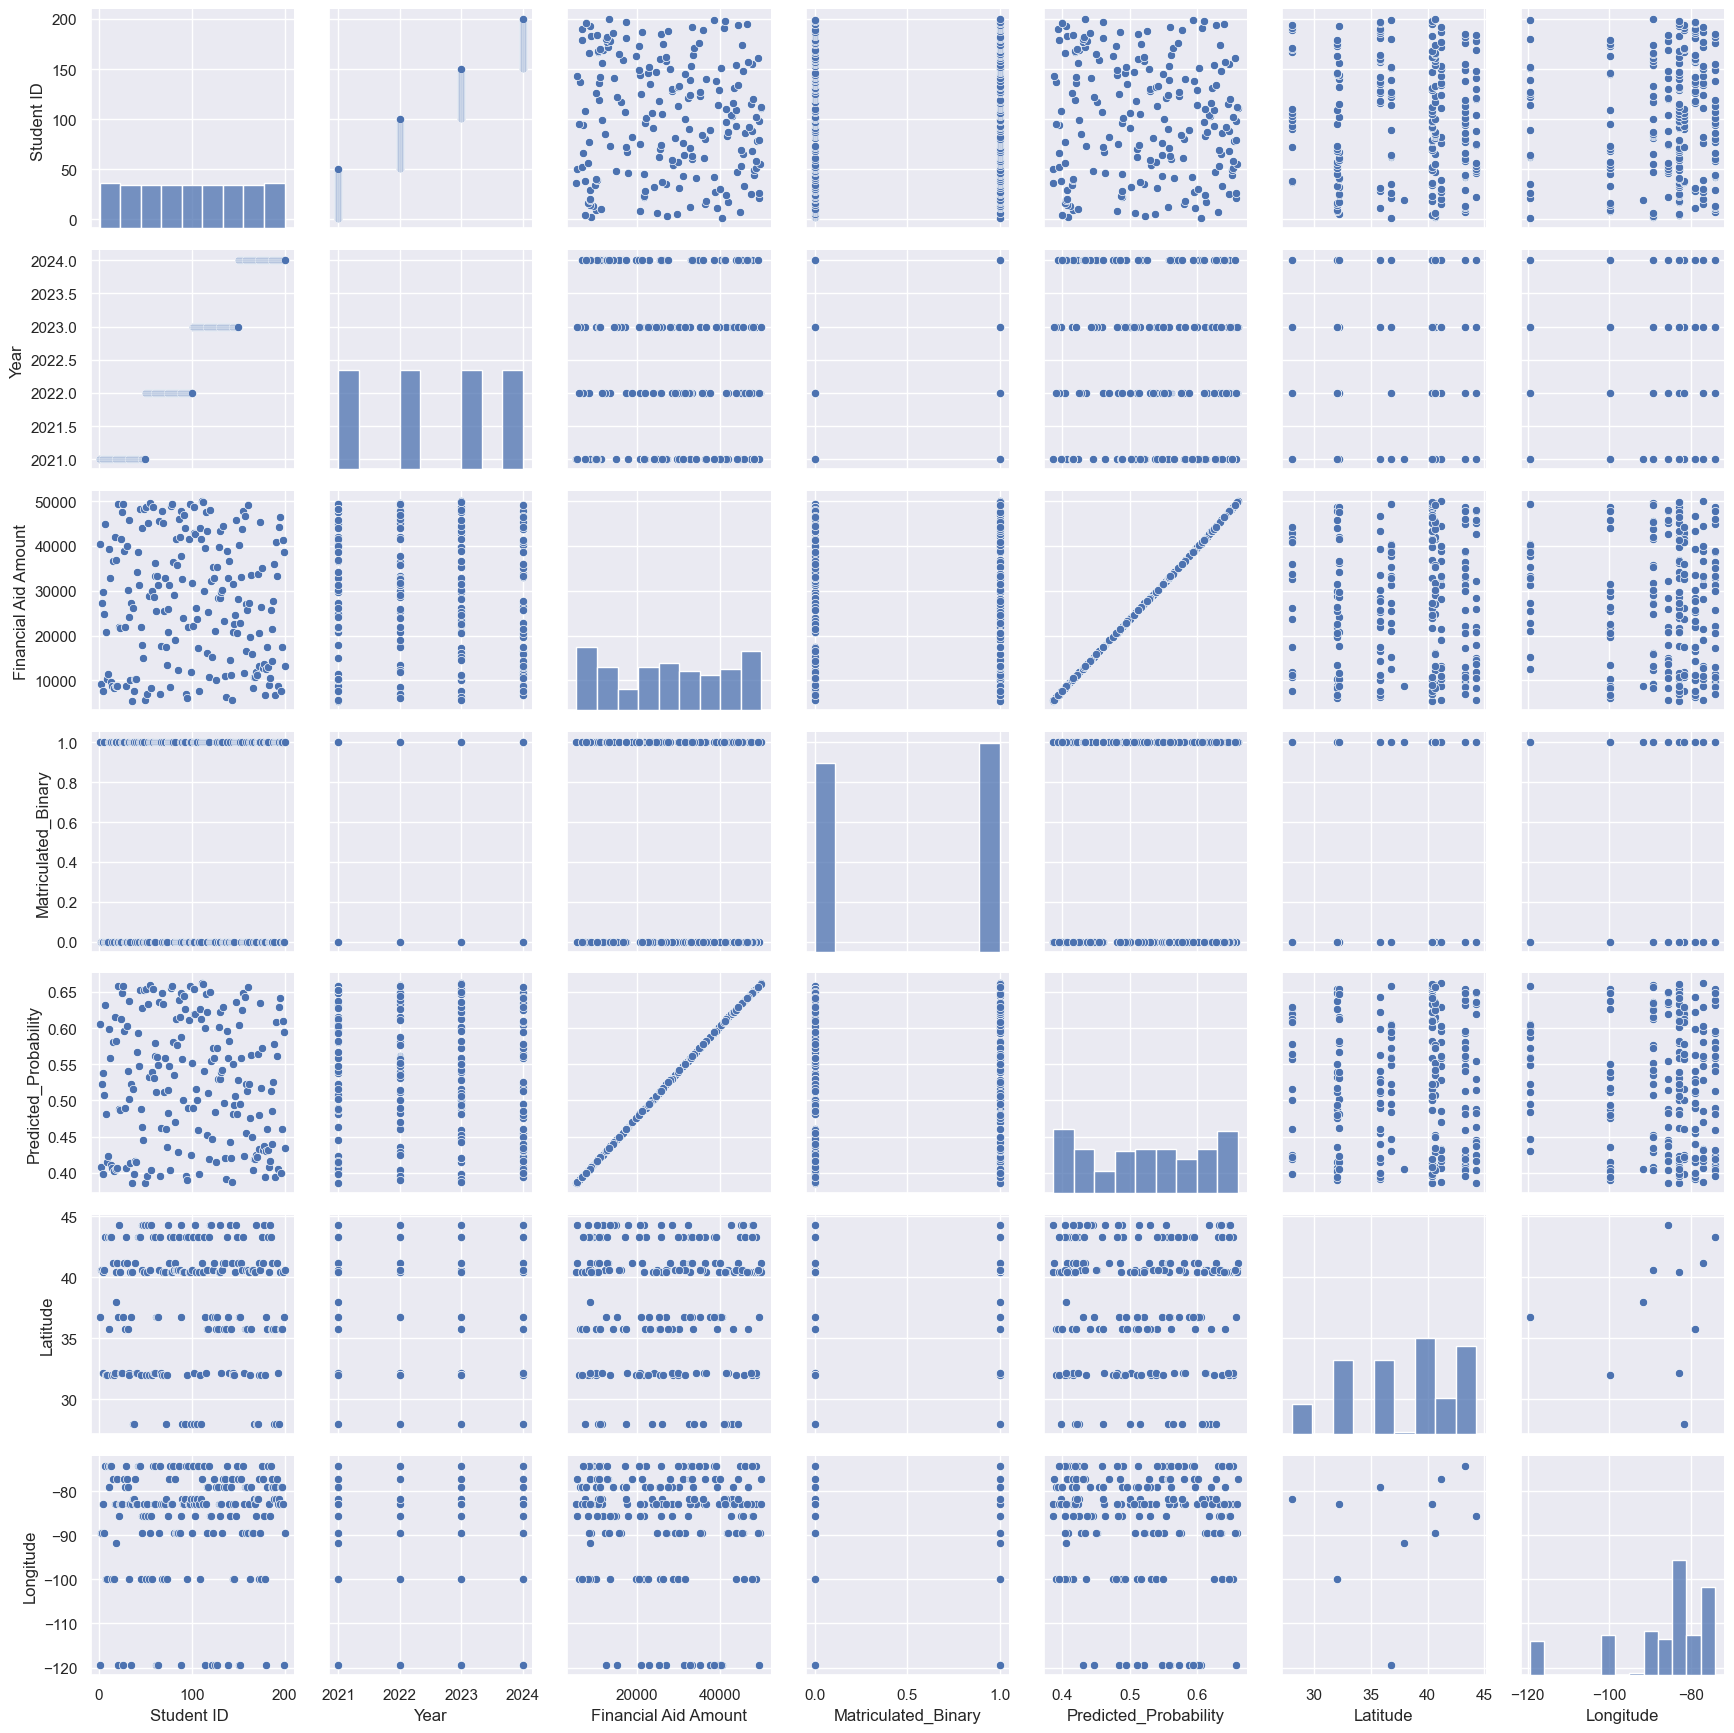

In [140]:
sns.pairplot(data=fadata)

plt.tight_layout() #tried to get rid of the warning but seems harmless-plot still shows

**Pairplot: Relationship by Matriculation Status**

C:\Users\ixw35\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



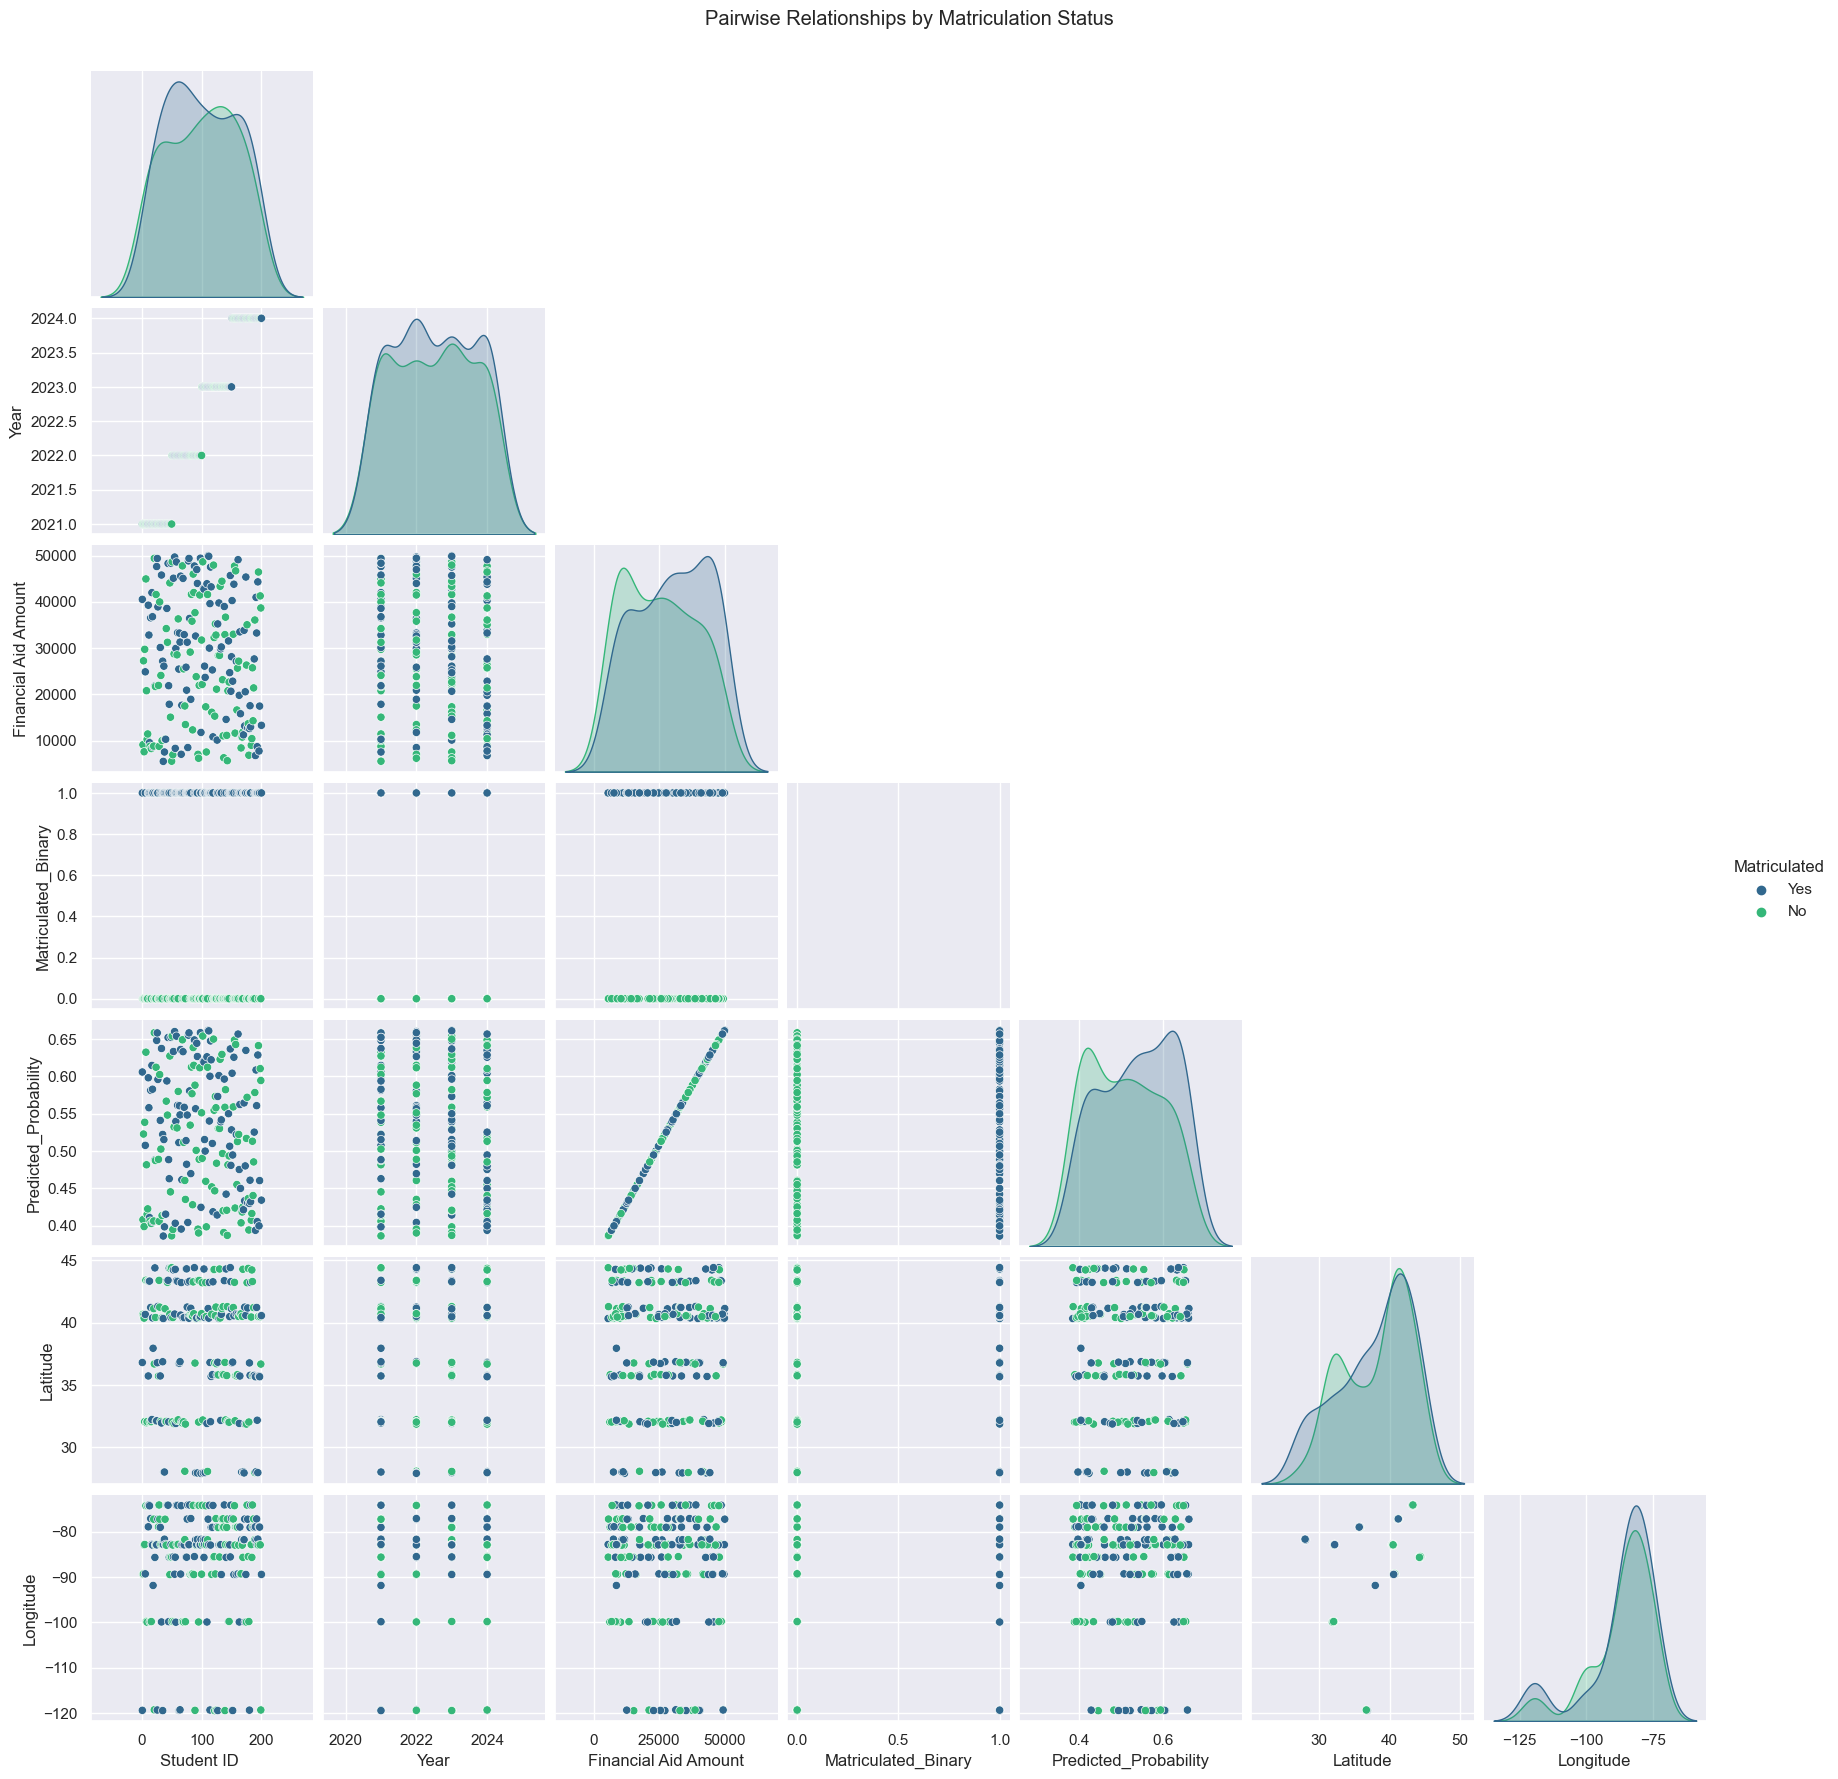

In [128]:
sns.pairplot(
    data=fadata,
    hue="Matriculated",
    diag_kind="kde",
    corner=True,
    palette="viridis"
)
plt.suptitle('Pairwise Relationships by Matriculation Status', y=1.02)
plt.show()

**Boxplot: Ditribution of Financial Aid Amount by Race and Matriculation**

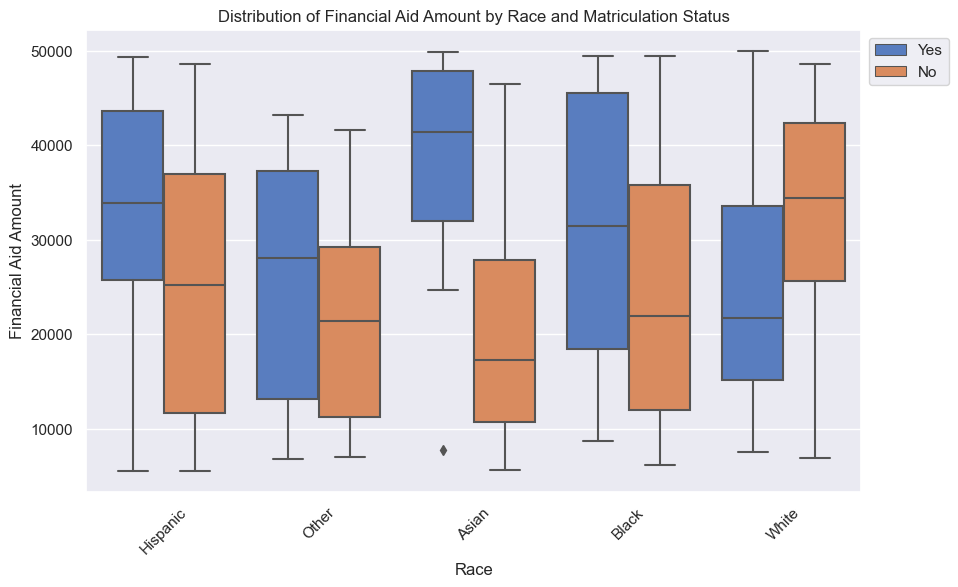

In [145]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=fadata,
    x="Race",
    y="Financial Aid Amount",
    hue="Matriculated",
    palette="muted"
)
plt.title('Distribution of Financial Aid Amount by Race and Matriculation Status')
plt.xlabel('Race')
plt.ylabel('Financial Aid Amount')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
#This chart could better show the differing financial aid needs and help to suggest new areas of concern

**Bar Plot: Avg. Financial Aid by Race and Matriculation Status**

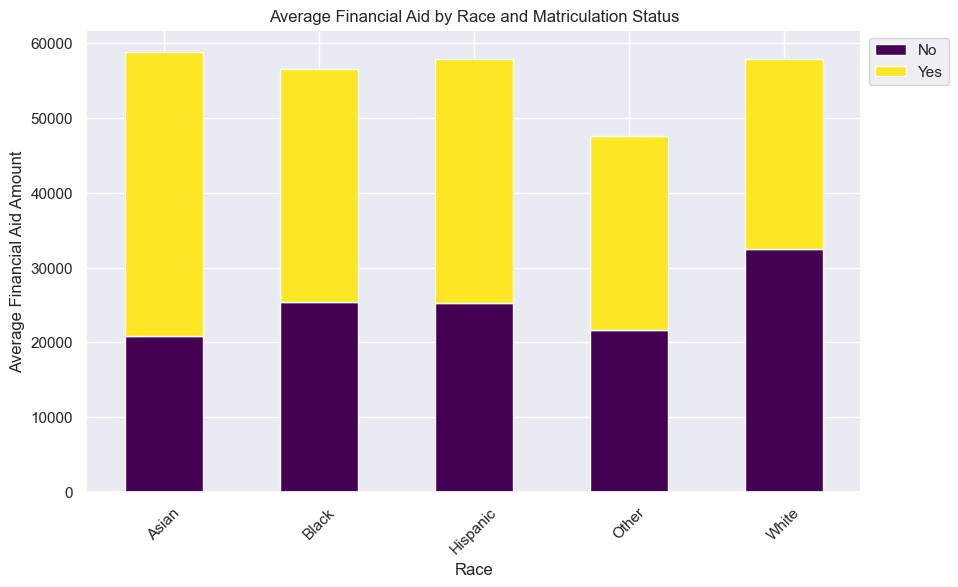

In [146]:
grouped = fadata.groupby(['Race', 'Matriculated'])['Financial Aid Amount'].mean().unstack()


grouped.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='viridis'
)
plt.title('Average Financial Aid by Race and Matriculation Status')
plt.xlabel('Race')
plt.ylabel('Average Financial Aid Amount')
plt.legend(title='Matriculated', loc='upper left')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()
#More of an insight on how FA is distributed across groups and matriculation status.

**Bubble Chart: Financial Aid Amount vs. Matriculation Status by Race

In [147]:
fig11 = px.scatter(
    fadata,
    x="Financial Aid Amount",
    y="Matriculated",
    size="Financial Aid Amount",
    color="Race",
    hover_name='Student ID ',
    title="Financial Aid Amount vs Matriculation (Bubble Chart)",
    labels={"Matriculated": "Matriculation Status"}
)
fig11.update_traces(marker=dict(opacity=0.7))
fig11.update_layout(height=600, width=800)
fig11.show()
#Will not use in presentation, not clear enough

**Violin Plot: Distribution of Financial Aid Amount by Matriculation and Race**

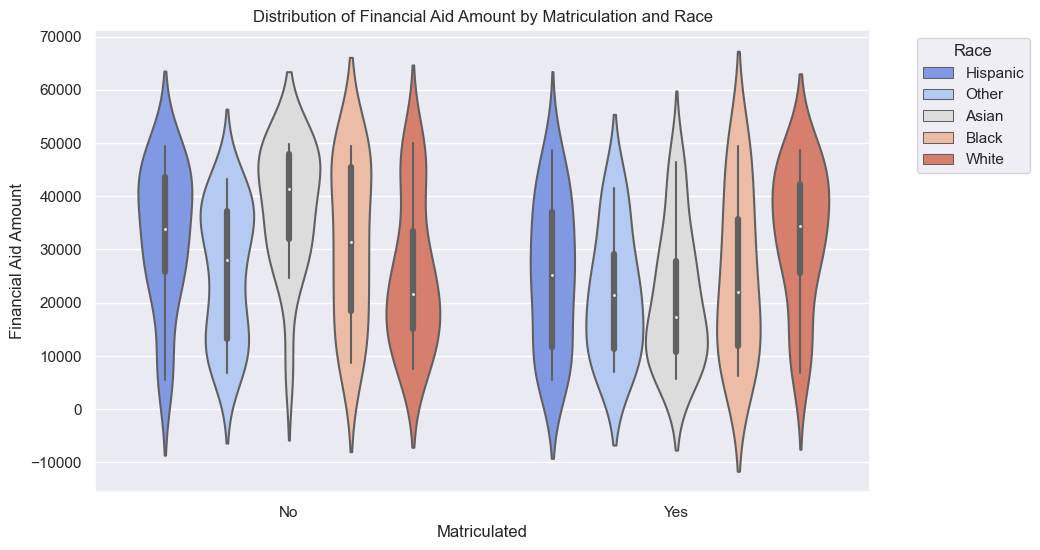

In [148]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=fadata,
    x="Matriculated",
    y="Financial Aid Amount",
    hue="Race",
    palette="coolwarm"
)
plt.title('Distribution of Financial Aid Amount by Matriculation and Race')
plt.xlabel('Matriculated')
plt.ylabel('Financial Aid Amount')
plt.xticks([0, 1], ['No', 'Yes']) 
plt.legend(title="Race", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

*Sources for charts and plots*: 
**Simplemaps**-https://simplemaps.com/docs/regions
**Data.Gov**- https://catalog.data.gov/dataset?q=state+coordinates+&sort=metadata_created+desc&ext_location=&ext_bbox=&ext_prev_extent=
**7 Python Data Visualization Libraries in 15 Minutes**- https://www.youtube.com/watch?v=4O_o53ag3ag&t=743s
**Plotly Tutorial 2023**-https://www.youtube.com/watch?v=GGL6U0k8WYA&t=1678s
**Python for Data Science**- https://www.youtube.com/watch?v=xcONCZR6bMo